# Blur images with Bilateral filtering

Then save them to data_blur folder

### Bilateral Filter

Removes noise but retains edges. It is like the Gaussian blurring, but if the algorithm sees that the pixel is part of an edge, it will not be included in the blurring.


In [1]:
import cv2
import glob
import matplotlib.pyplot as plt
import os
from PIL import Image
from skimage.io import imread, imshow
import time

In [2]:
cwd = os.getcwd()
damage_dir = cwd + '/data/training/00-damage/'
whole_dir = cwd + '/data/training/01-whole/'
damage_move_dir = cwd + '/data_blur/training/damaged/'
whole_move_dir = cwd + '/data_blur/training/whole/'

In [3]:
damage_dir_test = cwd + '/data/validation/00-damage/'
whole_dir_test = cwd + '/data/validation/01-whole/'
damage_move_dir_test = cwd + '/data_blur/validation/damaged/'
whole_move_dir_test = cwd + '/data_blur/validation/whole/'

### Example of bilateral filter

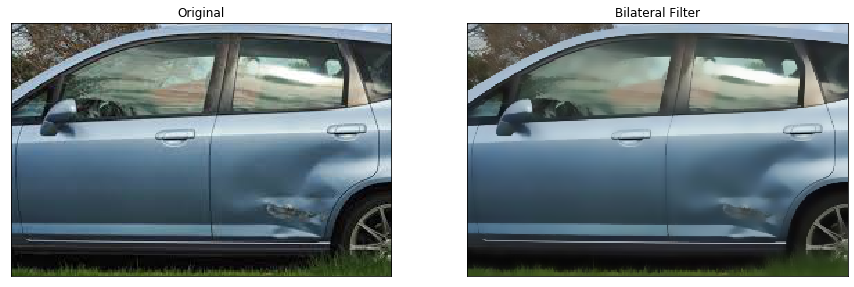

In [4]:
image = '0019.JPEG'
cwd = os.getcwd()
f = cwd + '/data/training/00-damage/' + image
img = imread(f)

#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Sometimes I need this and sometimes not. IDK why.
blur = cv2.bilateralFilter(img,9,75,75)

f, axs = plt.subplots(1,2,figsize=(15,15))
axs[0].imshow(img),axs[0].set_xticks([]),axs[0].set_yticks([]),axs[0].set_title("Original")
axs[1].imshow(blur),axs[1].set_xticks([]),axs[1].set_yticks([]),axs[1].set_title("Bilateral Filter")
plt.show()

### Adding blurred images to folder

In [7]:
t0 = time.time()
##### Training Data
## For damaged images
damage_list = glob.glob(damage_dir + "*.JPEG", recursive = True) + glob.glob(damage_dir + '*.jpeg')
damage_list.sort()
for filename in damage_list:
    image = imread(filename)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.bilateralFilter(image,9,75,75)
    cv2.imwrite(damage_move_dir + filename[-9:], image)
    
## For whole images    
whole_list = glob.glob(whole_dir + "*.JPEG", recursive = True) + glob.glob(whole_dir + "*.jpg", recursive = True)
whole_list.sort()
for filename in whole_list:
    image = imread(filename)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.bilateralFilter(image,9,75,75)
    cv2.imwrite(whole_move_dir + filename[-9:], image)
    
##### Testing Data
## For damaged images
damage_test_list = glob.glob(damage_dir_test + "*.JPEG", recursive = True) + glob.glob(damage_dir + '*.jpeg')
damage_test_list.sort()
for filename in damage_test_list:
    image = imread(filename)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.bilateralFilter(image,9,75,75)
    cv2.imwrite(damage_move_dir_test + filename[-9:], image)
    
## For whole images    
whole_test_list = glob.glob(whole_dir_test + "*.JPEG", recursive = True) + glob.glob(whole_dir_test + "*.jpg", recursive = True)
damage_test_list.sort()
for filename in whole_test_list:
    image = imread(filename)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.bilateralFilter(image,9,75,75)
    cv2.imwrite(whole_move_dir_test + filename[-9:], image)
t1 = time.time()
print(t1-t0)

-31.856809854507446
